<div style="display: flex; justify-content: center;">
    <img src="logo.jpeg" alt="CodeClause Logo" 
</div>


## Submitted By: Zyad Wael


# **1. Importing Libraries**

In [65]:
# IMPORTING ALL THE NECESSARY LIBRARIES FOR OUR PROJECT
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


# **2.    Data Preprocessing**

### 2.1 Data Exploration

In [66]:
df=pd.read_csv('gold.csv',low_memory=False)


In [67]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [68]:
df.shape

(2290, 6)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [70]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [71]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

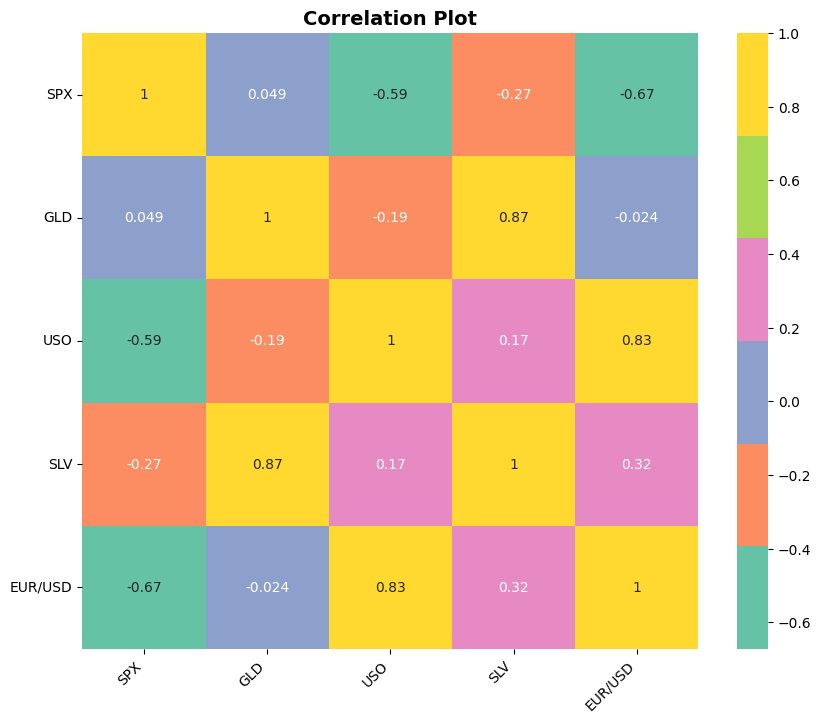

In [72]:
# Assuming df is your DataFrame
corr = df.corr(numeric_only=True)

# Generate a color palette
palette = sns.color_palette('Set2', len(df.columns))

# Create a correlation plot using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap=palette, square=True)

# Customize the plot
plt.title("Correlation Plot", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Display the plot
plt.show()


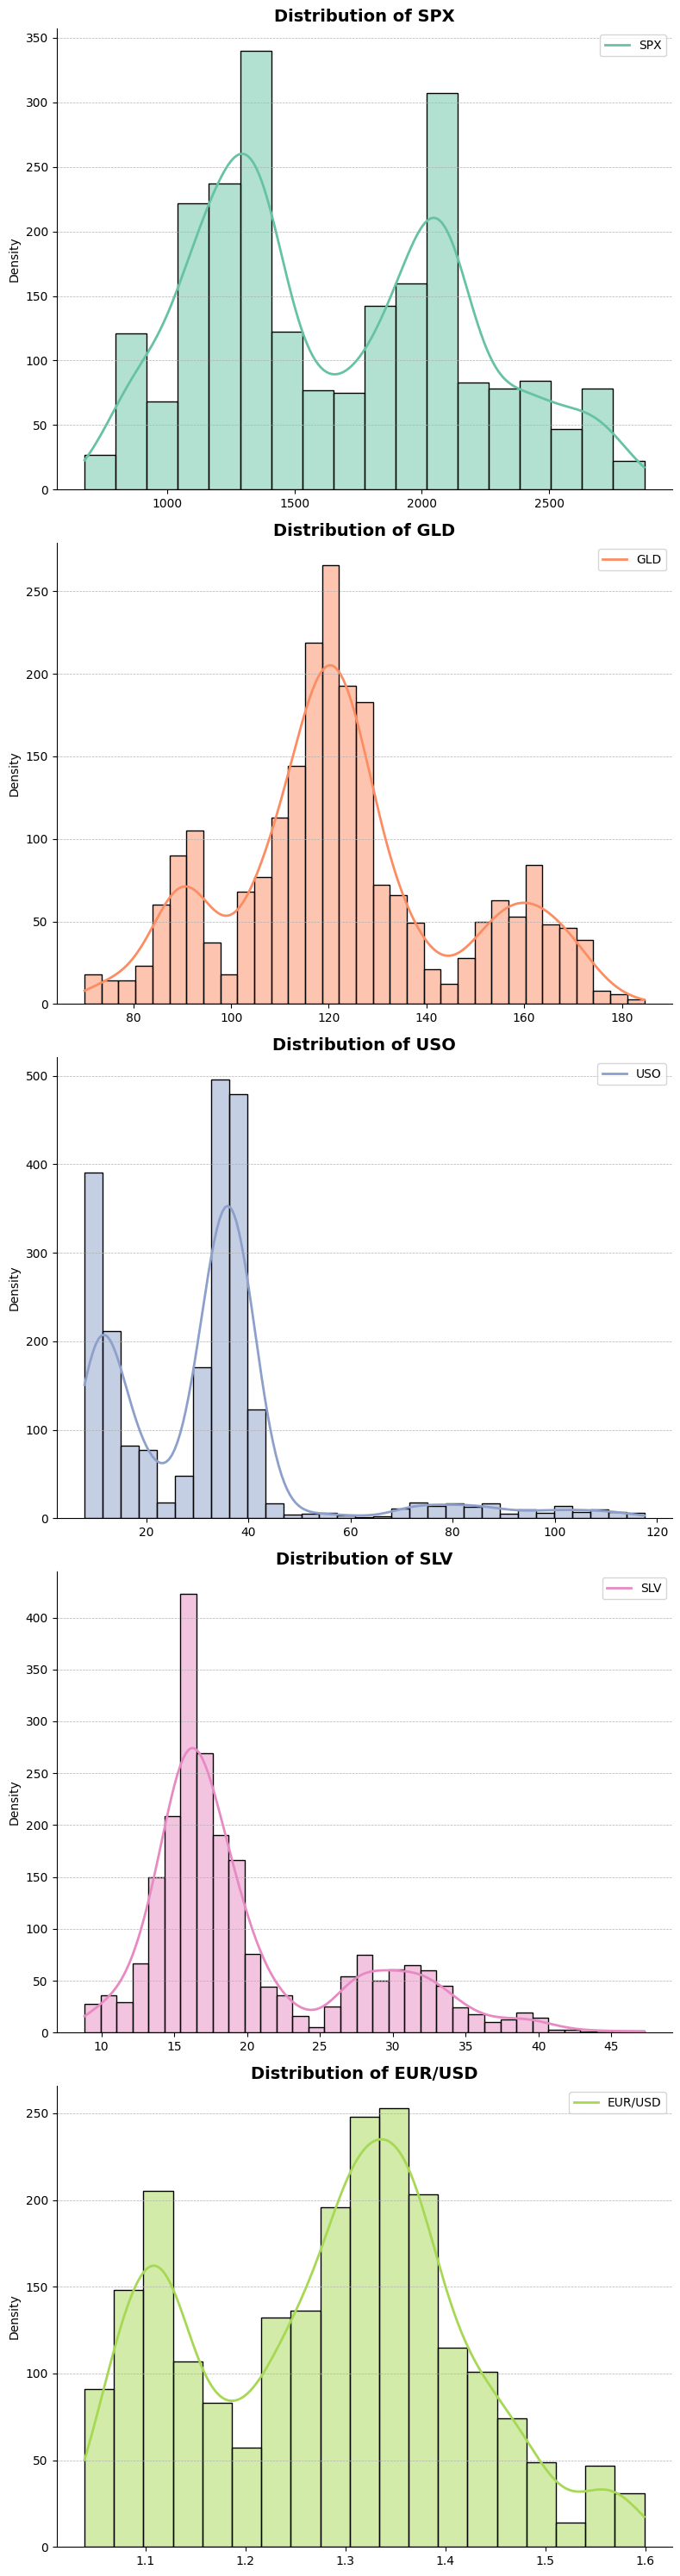

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with columns SPX, GLD, USO, SLV, and EUR/USD
columns = ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns), figsize=(8, 6 * len(columns)))

# Generate a color palette
palette = sns.color_palette('Set2', len(columns))

# Iterate through each column and create a distribution plot
for i, col in enumerate(columns):
    ax = axes[i]
    
    # Generate unique colors for each subplot
    color = palette[i]
    
    # Plot the distribution using histplot
    sns.histplot(df[col], ax=ax, color=color, kde=True, line_kws={'linewidth': 2})
    
    # Set title and axis labels
    ax.set_title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Density')
    
    # Customize tick labels and grid
    ax.tick_params(axis='both', labelsize=10)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)
    
    # Remove spines
    sns.despine(ax=ax)
    
    # Add a legend for the subplot color
    ax.legend([col], loc='upper right', fontsize=10)
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


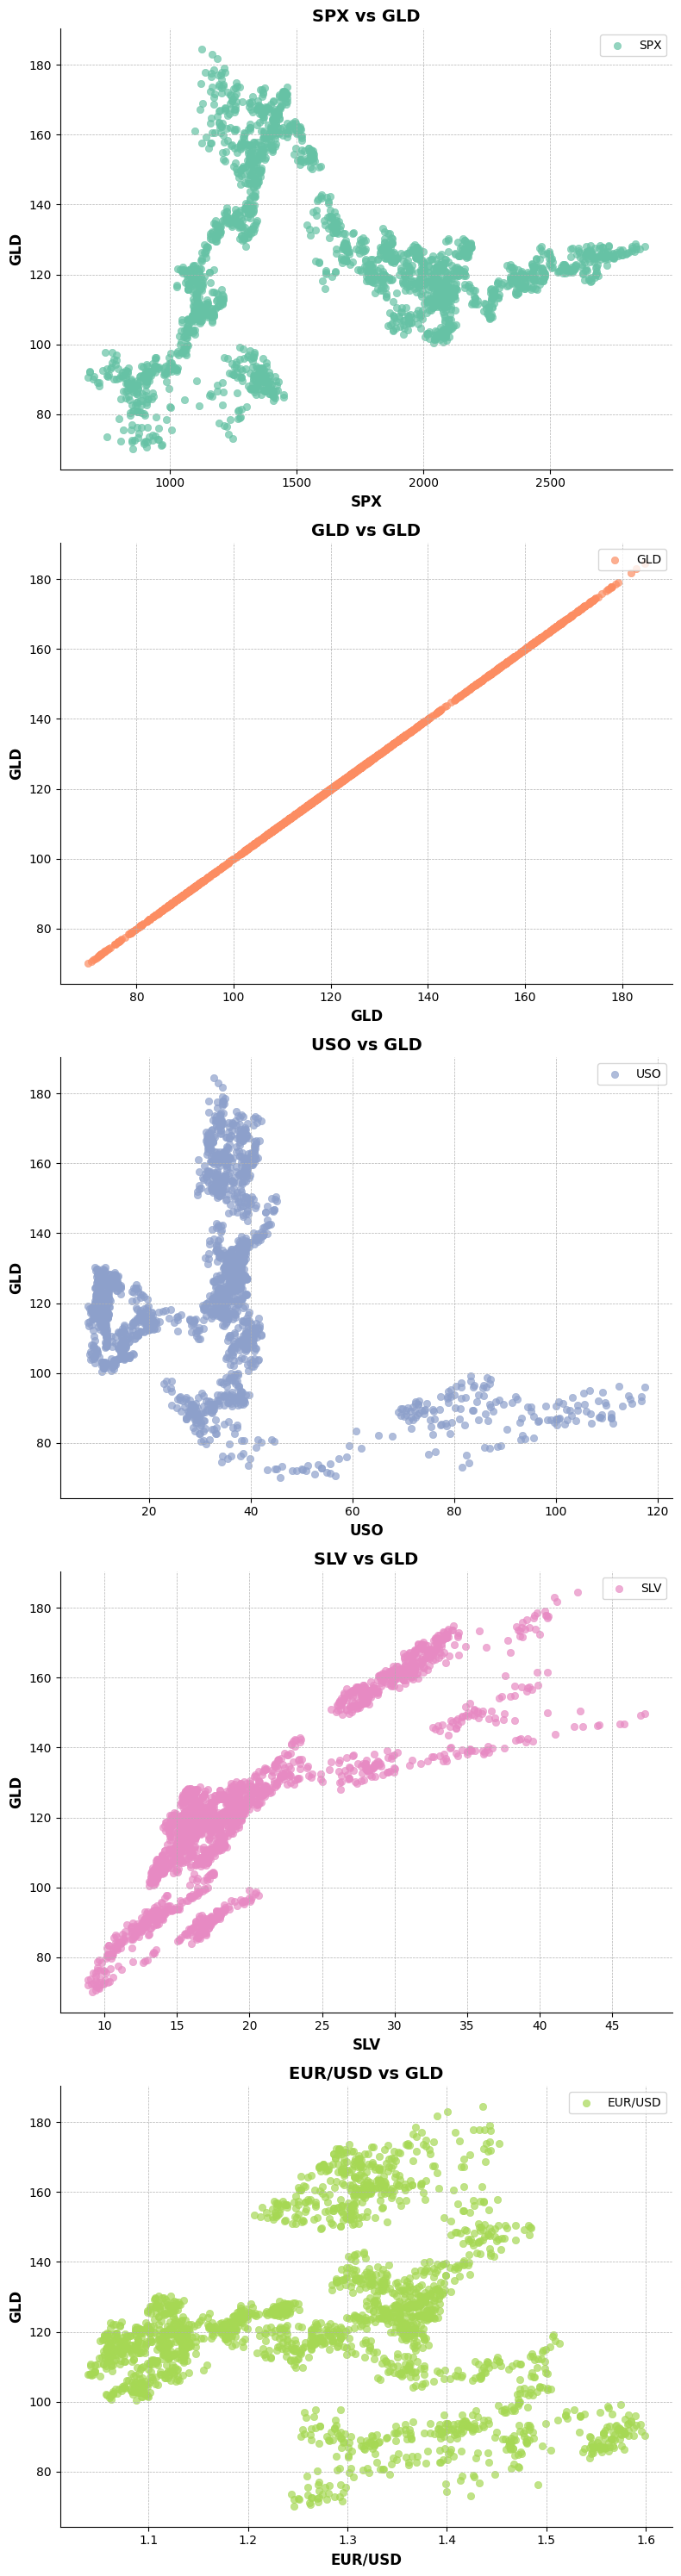

In [74]:

# Assuming df is your DataFrame with columns SPX, GLD, USO, SLV, and EUR/USD
columns = ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns), figsize=(8, 6 * len(columns)))

# Generate a color palette
palette = sns.color_palette('Set2', len(columns))

# Iterate through each column and create a scatter plot
for i, col in enumerate(columns):
    ax = axes[i]
    
    # Generate unique colors for each subplot
    color = palette[i]
    
    # Plot the scatter plot
    sns.scatterplot(x=df[col], y=df['GLD'], ax=ax, color=color, alpha=0.7, edgecolor=None)
    
    # Set title and axis labels
    ax.set_title(f"{col} vs GLD", fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('GLD', fontsize=12, fontweight='bold')
    
    # Customize tick labels and grid
    ax.tick_params(axis='both', labelsize=10)
    ax.grid(linestyle='--', linewidth=0.5)
    
    # Remove spines
    sns.despine(ax=ax)
    
    # Add a legend for the subplot color
    ax.legend([col], loc='upper right', fontsize=10)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


# **3.    Model Implementation**

### 3.1 Spliting Dataset Into Training and Test

In [75]:
X=df.drop(['Date','GLD'],axis=1)
Y=df['GLD']

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)


### 3.1 Building The Model

In [76]:

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the model
rf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf.predict(X_test)

# Evaluate the model
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", round(r2*100, 2),'%')


R-squared: 98.85 %


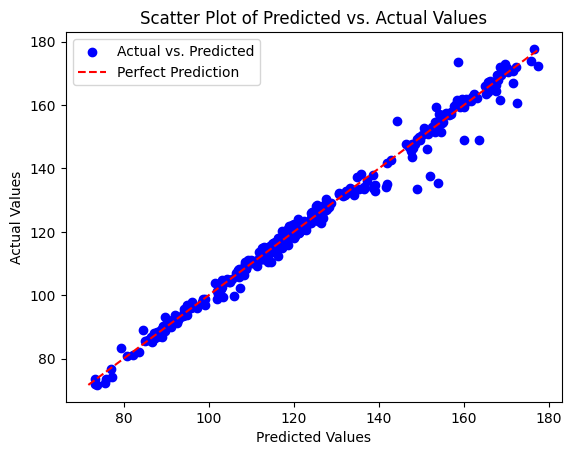

In [77]:
# Create a scatter plot of predicted vs. actual values
plt.scatter(Y_pred, Y_test, color='blue', label='Actual vs. Predicted')

# Add labels and title to the plot
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')

# Add a diagonal line for reference (perfect prediction)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [78]:



# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the model
rf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rf.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(Y_test, Y_pred)

print("R-squared:", round(r2, 2)*100, '%')


R-squared: 99.0 %


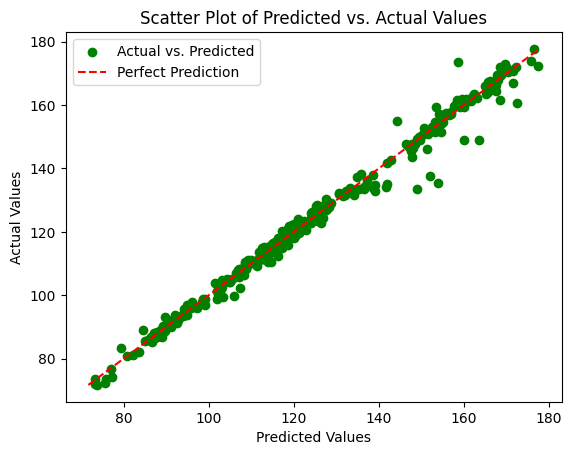

In [80]:
# Create a scatter plot of predicted vs. actual values
plt.scatter(Y_pred, Y_test, color='green', label='Actual vs. Predicted')

# Add labels and title to the plot
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')

# Add a diagonal line for reference (perfect prediction)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

# Add a legend
plt.legend()

# Display the plot
plt.show()
